In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)


In [171]:
# Create Dataframe
path = "Bank Customer Churn Prediction.csv"
df = pd.read_csv(path)
# Print shape of dataset
print(df.shape)

(10000, 12)


# Data Cleaning Overview


1. [Handling Missing Values](#Handling-Missing-Values)
2. [Handling Duplicates](#Handling-Duplicates)
3. [Check Data Types](#Check-Data-Types)
4. [Understand the Dataset](#Understand-the-Dataset)

### check null values

In [172]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

features_with_na

[]

### Handling Duplicates

In [173]:
df.duplicated().sum()

0

##### remove 'customer_id' column in the dataframe

In [174]:
df.drop(['customer_id'], inplace=True, axis=1)

In [175]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#####  Feature Engineering

###### Numerical Features

In [176]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 9


###### Categorical Features

In [177]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 2


###### Discrete Features

In [178]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 5


###### Continuous Features

In [179]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 4


#### Spilt X and Y

In [180]:
X = df.drop('churn', axis=1)
y = df['churn']

In [181]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

#### Feature Transformation

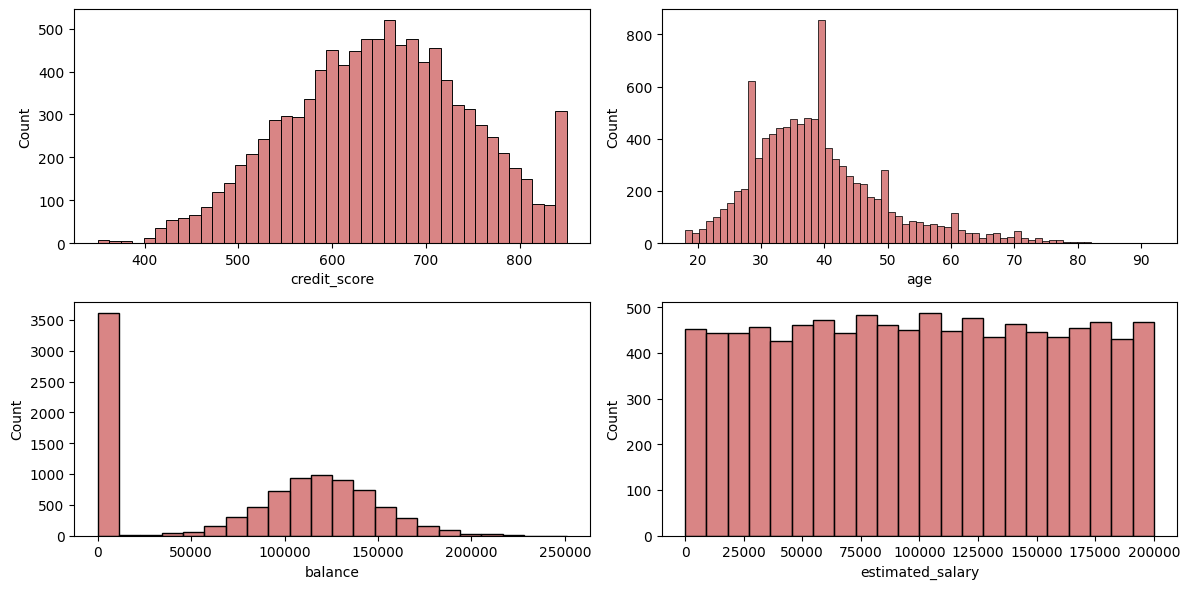

In [182]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['credit_score','age','balance', 'estimated_salary']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

##### checking skewness

In [183]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

credit_score       -0.071607
age                 1.011320
balance            -0.141109
estimated_salary    0.002085
dtype: float64

### Skewness Analysis of Dataset Features

Understanding the skewness of various features in a dataset is crucial for data preprocessing and modeling. Skewness indicates the asymmetry of the distribution of values in a feature relative to the mean. Below is the skewness analysis for key features in our dataset:

#### Feature: Credit Score
- ***Skewness Score:*** -0.071607
- ***Interpretation:*** The distribution of Credit Score values is slightly negatively skewed, indicating a minor concentration of data on the higher end. However, the skewness is close to 0, suggesting that the distribution is almost symmetrical with minor deviations.

#### Feature: Age
- ***Skewness Score:*** 1.011320
- ***Interpretation:*** Age exhibits a right-skewed distribution, indicated by a skewness score above 1. This suggests that the dataset contains more younger individuals, with the distribution tail extending towards older ages.

#### Feature: Balance
- ***Skewness Score:*** -0.141109
- ***Interpretation:*** The Balance feature is slightly negatively skewed, similar to Credit Score, though the skewness is close to 0. This indicates a slight concentration of data values towards the higher balance end, suggesting minor asymmetry in the distribution.

#### Feature: Estimated Salary
- ***Skewness Score:*** 0.002085
- ***Interpretation:*** With a skewness score very close to 0, the distribution of Estimated Salary values is nearly perfectly symmetrical. This indicates that the values do not significantly lean towards higher or lower salaries, suggesting an even distribution across the dataset.

By analyzing the skewness of these features, we can gain insights into the distribution of our data, guiding us in preprocessing steps such as normalization or transformation if necessary to improve model performance.


### Apply Power Transformer to Check if it can reduces the outliers

In [184]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['age']
X_copy = pt.fit_transform(X[transform_features])

In [185]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

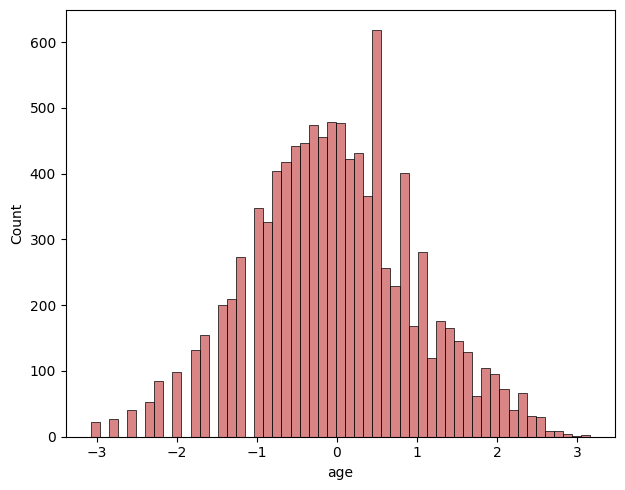

In [186]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [187]:
X_copy.skew(axis=0, skipna=True)

age   -0.002495
dtype: float64

In [188]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

country : 3
gender : 2
